In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)


In [2]:
#We chose 5 stocks
df1 = pdr.get_data_yahoo('AAPL',start='2011-01-01',end='2021-10-31')
df1 = df1[['Open','Close']]
df1 = df1.rename(columns ={'Open': 'Open_AAPL', 'Close':'Close_AAPL'})
df2 = pdr.get_data_yahoo('MSFT','2010-11-01','2021-10-31')
df2 = df2[['Open','Close']]
df2 = df2.rename(columns ={'Open': 'Open_MSFT', 'Close':'Close_MSFT'})
df3 = pdr.get_data_yahoo('INTC','2010-11-01','2021-10-31')
df3 = df3[['Open','Close']]
df3 = df3.rename(columns ={'Open':'Open_INTC','Close':'Close_INTC'})
df4 = pdr.get_data_yahoo('AMD','2010-11-01','2021-10-31')
df4 = df4[['Open','Close']]
df4 = df4.rename(columns ={'Open': 'Open_AMD', 'Close':'Close_AMD'})
df5 =  pdr.get_data_yahoo('CSCO','2010-11-01','2021-10-31')
df5 = df5[['Open','Close']]
df5 = df5.rename(columns ={'Open': 'Open_CSCO', 'Close':'Close_CSCO'})
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_AAPL,Close_AAPL,Open_MSFT,Close_MSFT,Open_INTC,Close_INTC,Open_AMD,Close_AMD,Open_CSCO,Close_CSCO
Date,,,,,,,,,,
2010-12-31,11.533929,11.520000,27.799999,27.910000,21.030001,21.030001,8.140000,8.180000,20.240000,20.230000
2011-01-03,11.630000,11.770357,28.049999,27.980000,21.010000,20.850000,8.440000,8.470000,20.450001,20.490000
2011-01-04,11.872857,11.831786,27.940001,28.090000,21.120001,21.150000,8.560000,8.770000,20.510000,20.520000
2011-01-05,11.769643,11.928571,27.900000,28.000000,21.190001,20.940001,8.740000,8.910000,20.580000,20.770000
2011-01-06,11.954286,11.918929,28.040001,28.820000,20.670000,20.770000,8.920000,8.690000,20.910000,20.950001
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,148.679993,148.639999,309.359985,308.130005,49.830002,49.410000,120.519997,122.360001,55.110001,55.139999
2021-10-26,149.330002,149.320007,311.000000,310.109985,49.400002,48.279999,122.989998,122.930000,55.560001,55.810001
2021-10-27,149.360001,148.850006,316.000000,323.170013,48.520000,47.889999,121.629997,122.279999,56.130001,56.180000


In [3]:
#Slice off the first three years.
three_years = df.loc['2011-01-01': '2014-12-31']
three_years = three_years[['Close_AAPL','Close_MSFT','Close_INTC','Close_AMD','Close_CSCO']]
three_years['Return_AAPL']= three_years['Close_AAPL'].pct_change()
three_years['Return_MSFT']= three_years['Close_MSFT'].pct_change()
three_years['Return_INTC']= three_years['Close_INTC'].pct_change()
three_years['Return_AMD']= three_years['Close_AMD'].pct_change()
three_years['Return_CSCO']= three_years['Close_CSCO'].pct_change()
three_years = three_years[['Return_AAPL','Return_MSFT','Return_INTC','Return_AMD','Return_CSCO']]
three_years= three_years.dropna()
three_years

,Return_AAPL,Return_MSFT,Return_INTC,Return_AMD,Return_CSCO
Date,,,,,
2011-01-04,0.005219,0.003931,0.014388,0.035419,0.001464
2011-01-05,0.008180,-0.003204,-0.009929,0.015963,0.012183
2011-01-06,-0.000808,0.029286,-0.008118,-0.024691,0.008666
2011-01-07,0.007161,-0.007634,-0.005296,0.016111,0.000955
2011-01-10,0.018833,-0.013287,0.001452,0.040770,-0.008584
...,...,...,...,...,...
2014-12-24,-0.004709,-0.006398,0.000267,-0.007491,0.001770
2014-12-26,0.017677,-0.005401,0.002938,0.000000,0.001767
2014-12-29,-0.000702,-0.008981,-0.009854,0.003774,0.003880


In [4]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T
no_of_asset_classes = 5
no_of_portfolios = 10000
np.random.seed(123)

collection_of_random_asset_weights = [] 
portfolio_means = [] 
portfolio_standard_deviations = [] 
portfolio_sharpe_ratios = [] 

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[2])
    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

#print(collection_of_random_asset_weights[index])

x=collection_of_random_asset_weights[index]
some_weights = pd.DataFrame({"AAPL": x[0,0], "MSFT": x[0,1], "INTC": x[0,2],"AMD" : x[0,3] ,"CSCO":x[0,4]}, index = [three_years.last_valid_index()])  
some_weights

,AAPL,MSFT,INTC,AMD,CSCO
2014-12-31,0.408896,0.395262,0.185759,0.000265,0.009819


In [5]:
capital = 10000
allocations = capital*some_weights
allocations

,AAPL,MSFT,INTC,AMD,CSCO
2014-12-31,4088.959276,3952.615046,1857.585329,2.654906,98.185443


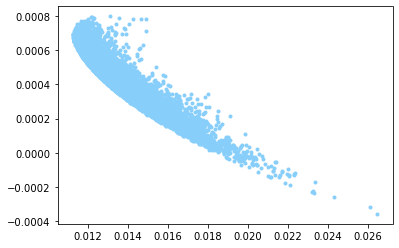

In [6]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

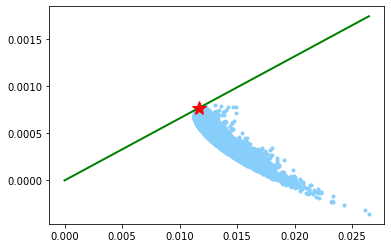

In [7]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="red",marker="*",markersize = 15)
plt.show()

In [8]:
print("The maximum value of Sharpe ratio achieved is : ",portfolio_sharpe_ratios[index])
print("with index value as: ",index)

The maximum value of Sharpe ratio achieved is :  0.0659849544255796
with index value as:  1566


In [9]:
print(df['Close_AAPL'].loc[some_weights.last_valid_index()])
print(df['Close_MSFT'].loc[some_weights.last_valid_index()])
print(df['Close_INTC'].loc[some_weights.last_valid_index()])
print(df['Close_AMD'].loc[some_weights.last_valid_index()])
print(df['Close_CSCO'].loc[some_weights.last_valid_index()])

no_of_shares = allocations /df[[f'Open_{sym}' for sym in some_weights.columns]].loc[some_weights.index[0]].values
no_of_shares

27.594999313354492
46.45000076293945
36.290000915527344
2.6700000762939453
27.81999969482422


,AAPL,MSFT,INTC,AMD,CSCO
2014-12-31,144.972852,84.584102,50.712129,1.005646,3.471904


In [10]:
seven_years = df.loc['2014-12-31':] 
seven_years['Open'] = seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Open_MSFT']*no_of_shares['MSFT'].iloc[0] + seven_years['Open_INTC']*no_of_shares['INTC'].iloc[0]+ seven_years['Open_AMD']*no_of_shares['AMD'].iloc[0]+ seven_years['Open_CSCO']*no_of_shares['CSCO'].iloc[0]
seven_years['Close'] = seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0] + seven_years['Close_MSFT']*no_of_shares['MSFT'].iloc[0]+ seven_years['Close_INTC']*no_of_shares['INTC'].iloc[0]+ seven_years['Close_AMD']*no_of_shares['AMD'].iloc[0]+ seven_years['Close_CSCO']*no_of_shares['CSCO'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

,Open,Close
Date,,
2014-12-31,10000.000000,9869.073985
2015-01-02,9942.851641,9860.060380
2015-01-05,9780.258869,9689.348778
2015-01-06,9710.948810,9598.151956
2015-01-07,9678.701843,9739.557631
...,...,...
2021-10-25,50561.021679,50431.842297
2021-10-26,50776.214603,50643.494497
2021-10-27,51159.468698,51660.881056


Abslute Return of Our Portofolio:425.67%
CAGR of Our Portofolio: 167.43%
Information Ratio of Our Portofolio:1.10



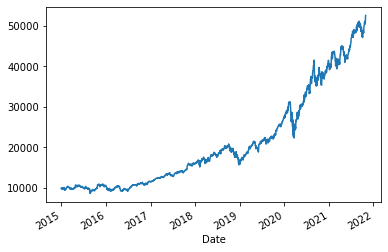

In [11]:
# Calculate the Absolute Return .
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
# Calculate the CAGR .
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
# Calculate the IR .
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
axs = seven_years.Close.plot()

In [12]:
short_time = 5
long_time = 15
seven_years['Close_Short_Rolling']= seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling']= seven_years['Close'].rolling(window = long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling'] - seven_years['Close_Short_Rolling']
seven_years['Open_1_change'] = seven_years['Open']-seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2015-01-22,9871.307586,10033.403877,9796.416813,9821.773405,25.356592,119.172450
2015-01-23,10051.293476,10034.299647,9873.005563,9832.788449,-40.217114,179.985890
2015-01-26,10033.458527,9991.141106,9931.323783,9841.527164,-89.796619,-17.834949
2015-01-27,9549.987847,9393.899086,9851.277937,9821.830518,-29.447419,-483.470680
2015-01-28,9724.281586,9472.006078,9784.949959,9813.420793,28.470834,174.293739
...,...,...,...,...,...,...
2021-10-25,50561.021679,50431.842297,50715.130946,49479.426604,-1235.704342,-264.630242
2021-10-26,50776.214603,50643.494497,50694.260512,49661.672373,-1032.588139,215.192923
2021-10-27,51159.468698,51660.881056,50874.287752,49878.562429,-995.725323,383.254095


In [13]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[0.00340794760750423]
1,Close,[-0.0020798388733382685]
2,Close_Short_Rolling,[-0.0009797552633621766]
3,Close_Long_Rolling,[-0.0003402380147495499]
4,Window_diff,[0.0006395172486124788]
5,Open_1_change,[-0.0006646879801981954]


In [14]:
#
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[213 304]
 [250 428]]
0.5364016736401673


In [15]:
results = X_test.copy()
results['C2C_Price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2017-02-02,11945.773041,11982.241880,11961.588433,11771.603368,-189.985065,-87.325454,55.403856,1,1,55.403856,55.403856
2017-02-03,12003.091254,12037.645737,11963.489923,11801.141566,-162.348357,57.318213,29.120913,-1,1,-29.120913,26.282943
2017-02-06,12023.842704,12066.766650,11990.327116,11832.355709,-157.971407,20.751449,31.414940,-1,1,-31.414940,-5.131997
2017-02-07,12094.114379,12098.181590,12039.807002,11864.338916,-175.468086,70.271676,12.039334,1,1,12.039334,6.907337
2017-02-08,12102.947025,12110.220924,12059.011356,11897.440028,-161.571329,8.832646,28.675418,1,1,28.675418,35.582755
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,50825.651921,50526.089976,50690.485043,49258.563242,-1431.921801,173.201916,-94.247679,1,-1,-94.247679,34031.882534
2021-10-25,50561.021679,50431.842297,50715.130946,49479.426604,-1235.704342,-264.630242,211.652200,1,1,211.652200,34243.534735
2021-10-26,50776.214603,50643.494497,50694.260512,49661.672373,-1032.588139,215.192923,1017.386559,1,1,1017.386559,35260.921294


Abslute Return of Our Algorithmic Trading:423.09%
Abslute Return of Our buy-and-hold Trading :337.88%
CAGR of Our Algorithmic Trading: 167.28%
CAGR of Our buy-and-hold Trading: 14.62%
Information Ratio of Our Algorithmic Trading:1.29
Information Ratio of Our buy-and-hold Trading:1.29



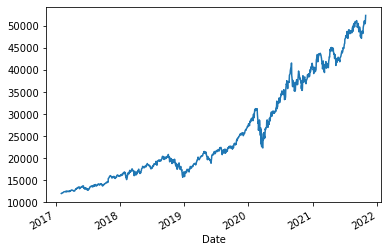

In [16]:
#Calculate the Abslute Return of Our Algorithmic Trading.
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
#Calculate the CAGR of Our Algorithmic Trading.
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
#Calculate the IR Of Our Algorithmic Trading.
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)


##Calculate the Abslute Return of Our buy-and-hold Trading. 
absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
#Calculate the CAGR of Our buy-and-hold Trading. 
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
#Calculate the IR Of Our buy-and-hold Trading .
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)




s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()
#or
axs=results.Close.plot()


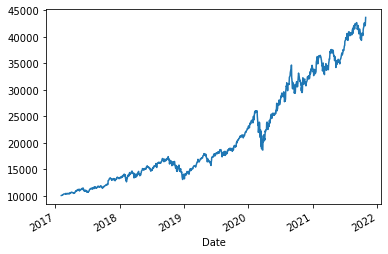

In [17]:
((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()
#or
axs=((results.Close.pct_change().dropna()+1).cumprod()*capital).plot()